# Police Force Responses by Crime

In [1]:
#Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
#Import csv file
police_data = pd.read_csv("Resources/Police_Use_of_Force.csv")
police_data.head()

,X,Y,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,Is911Call,PrimaryOffense,SubjectInjury,ForceReportNumber,...,TotalCityCallsForYear,TotalPrecinctCallsForYear,TotalNeighborhoodCallsForYear,CenterGBSID,CenterLatitude,CenterLongitude,CenterX,CenterY,DateAdded,OBJECTID
0,-93.299256,44.980557,19194596,08-007748,2008/01/08 14:20:21+00,Disturbance,No,DISCON,NaN,1,...,322402,80434.0,2514,15824,44.980557,-93.299256,-10386025.66,5618461.049,2021/02/11 08:18:54+00,1
1,-93.273109,44.979187,19194597,08-019047,2008/01/19 23:47:58+00,On Site,No,NOSMOK,NaN,1,...,322402,46998.0,23458,17239,44.979187,-93.273109,-10383115.01,5618245.449,2021/02/11 08:18:54+00,2
2,-93.311817,45.006028,19194598,08-034409,2008/02/04 21:21:49+00,Property Damage Accident,Yes,ASLT2,NaN,1,...,322402,80434.0,9486,10909,45.006028,-93.311817,-10387423.95,5622470.553,2021/02/11 08:18:54+00,3
3,-93.288860,45.043001,19194599,08-043573,2008/02/14 22:03:15+00,Unwanted Person,Yes,DAMPRP,NaN,2,...,322402,80434.0,3070,17338,45.043001,-93.288860,-10384868.44,5628293.683,2021/02/11 08:18:54+00,4
4,-93.271963,44.981655,19194600,08-052540,2008/02/24 02:25:39+00,Fight,No,OBSTRU,No,3,...,322402,46998.0,23458,17120,44.981655,-93.271963,-10382987.47,5618633.899,2021/02/11 08:18:54+00,5


In [3]:
police_data.columns

Index(['X', 'Y', 'PoliceUseOfForceID', 'CaseNumber', 'ResponseDate', 'Problem',
       'Is911Call', 'PrimaryOffense', 'SubjectInjury', 'ForceReportNumber',
       'SubjectRole', 'SubjectRoleNumber', 'ForceType', 'ForceTypeAction',
       'Race', 'Sex', 'EventAge', 'TypeOfResistance', 'Precinct',
       'Neighborhood', 'TotalCityCallsForYear', 'TotalPrecinctCallsForYear',
       'TotalNeighborhoodCallsForYear', 'CenterGBSID', 'CenterLatitude',
       'CenterLongitude', 'CenterX', 'CenterY', 'DateAdded', 'OBJECTID'],
      dtype='object')

In [4]:
police_data_df = police_data.loc[:, ["PoliceUseOfForceID", "CaseNumber", "ResponseDate", "Problem", "ForceType",
                                    "ForceTypeAction", "EventAge", "TypeOfResistance", "Precinct", "Neighborhood"]]
police_data_df

,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,ForceType,ForceTypeAction,EventAge,TypeOfResistance,Precinct,Neighborhood
0,19194596,08-007748,2008/01/08 14:20:21+00,Disturbance,Bodily Force,Push Away,13.0,Tensed,4,Harrison
1,19194597,08-019047,2008/01/19 23:47:58+00,On Site,Bodily Force,Push Away,27.0,Tensed,1,Downtown West
2,19194598,08-034409,2008/02/04 21:21:49+00,Property Damage Accident,Bodily Force,Joint Lock,17.0,Verbal Non-Compliance,4,Willard - Hay
3,19194599,08-043573,2008/02/14 22:03:15+00,Unwanted Person,Bodily Force,Body Weight to Pin,18.0,Tensed,4,Lind - Bohanon
4,19194600,08-052540,2008/02/24 02:25:39+00,Fight,Bodily Force,Knees,28.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...
32030,19226626,09-Cooper,2009/01/01 00:00:00+00,NaN,NaN,0,NaN,NaN,NaN,Cooper
32031,19226627,08-Bottineau,2008/01/01 00:00:00+00,NaN,NaN,0,NaN,NaN,NaN,Bottineau
32032,19226628,09-Loring Park,2009/01/01 00:00:00+00,NaN,NaN,0,NaN,NaN,NaN,Loring Park
32033,19226629,14-Cooper,2014/01/01 00:00:00+00,NaN,NaN,0,NaN,NaN,NaN,Cooper


In [5]:
police_data_df.dtypes

PoliceUseOfForceID      int64
CaseNumber             object
ResponseDate           object
Problem                object
ForceType              object
ForceTypeAction        object
EventAge              float64
TypeOfResistance       object
Precinct               object
Neighborhood           object
dtype: object

In [6]:
police_data_df = police_data_df.dropna(how='any')
police_data_df

,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,ForceType,ForceTypeAction,EventAge,TypeOfResistance,Precinct,Neighborhood
0,19194596,08-007748,2008/01/08 14:20:21+00,Disturbance,Bodily Force,Push Away,13.0,Tensed,4,Harrison
1,19194597,08-019047,2008/01/19 23:47:58+00,On Site,Bodily Force,Push Away,27.0,Tensed,1,Downtown West
2,19194598,08-034409,2008/02/04 21:21:49+00,Property Damage Accident,Bodily Force,Joint Lock,17.0,Verbal Non-Compliance,4,Willard - Hay
3,19194599,08-043573,2008/02/14 22:03:15+00,Unwanted Person,Bodily Force,Body Weight to Pin,18.0,Tensed,4,Lind - Bohanon
4,19194600,08-052540,2008/02/24 02:25:39+00,Fight,Bodily Force,Knees,28.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...
30829,19225425,20-287806,2020/11/12 14:41:54+00,Domestic Abuse-In Progress,Maximal Restraint Technique,Not Side Recovery Position,19.0,Other ...,2,Waite Park
30830,19225426,20-288772,2020/11/13 21:48:02+00,Unwanted Person,Bodily Force,Body Weight Pin,29.0,Verbal Non-Compliance ...,5,Linden Hills
30831,19225427,20-292656,2020/11/19 15:44:41+00,Emotionally Disturb Person,Taser,Firing Darts,23.0,Other ...,4,Willard - Hay
30832,19225428,20-298833,2020/11/28 08:18:10+00,Motor Vehicle Chase,Bodily Force,Push Away,31.0,Fled in a Vehicle ...,3,East Phillips


In [7]:
clean_df = police_data_df.drop_duplicates(subset=['CaseNumber'])
clean_df

,PoliceUseOfForceID,CaseNumber,ResponseDate,Problem,ForceType,ForceTypeAction,EventAge,TypeOfResistance,Precinct,Neighborhood
0,19194596,08-007748,2008/01/08 14:20:21+00,Disturbance,Bodily Force,Push Away,13.0,Tensed,4,Harrison
1,19194597,08-019047,2008/01/19 23:47:58+00,On Site,Bodily Force,Push Away,27.0,Tensed,1,Downtown West
2,19194598,08-034409,2008/02/04 21:21:49+00,Property Damage Accident,Bodily Force,Joint Lock,17.0,Verbal Non-Compliance,4,Willard - Hay
3,19194599,08-043573,2008/02/14 22:03:15+00,Unwanted Person,Bodily Force,Body Weight to Pin,18.0,Tensed,4,Lind - Bohanon
4,19194600,08-052540,2008/02/24 02:25:39+00,Fight,Bodily Force,Knees,28.0,Commission of Crime,1,Downtown West
...,...,...,...,...,...,...,...,...,...,...
30819,19225415,20-245238,2020/09/22 11:48:57+00,Check the Welfare,Bodily Force,Joint Lock,32.0,Verbal Non-Compliance ...,2,Marcy Holmes
30824,19225420,20-271853,2020/10/23 22:22:28+00,Domestic Abuse-In Progress,Taser,Red Dot,56.0,Other ...,2,Prospect Park - East River Road
30825,19225421,20-275777,2020/10/28 22:12:02+00,Domestic Abuse-In Progress,Bodily Force,Body Weight Pin,24.0,Other ...,5,Windom
30826,19225422,20-278181,2020/10/31 17:00:10+00,Domestic Abuse-In Progress,Taser,Red Dot,37.0,Other ...,4,Willard - Hay


# 1. What incidents result the most in police use of force? (Sam)

In [8]:
test_data = clean_df["Problem"].describe(include= "all")
test_data

count                  12584
unique                   131
top       Suspicious Person 
freq                    2341
Name: Problem, dtype: object

In [9]:
incident_data = clean_df.groupby("Problem")
total_count = incident_data.nunique()["CaseNumber"]

incidents = pd.DataFrame({"Total Count": total_count})
top_incidents = incidents.sort_values("Total Count", ascending=False)

top_incidents.index.name = "Incidents"
top_incidents.head()

,Total Count
Incidents,
Suspicious Person,2341
Fight,1348
Disturbance,1031
Domestic Abuse-In Progress,719
Suspicious Vehicle,570


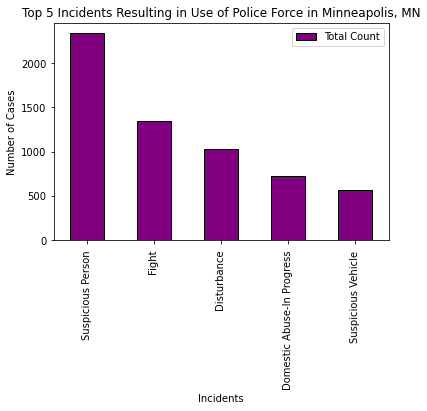

In [10]:
top_incidents.head(5)
top_incidents.head(5).plot(kind="bar",edgecolor="black", facecolor="purple", fontsize=10)
plt.title("Top 5 Incidents Resulting in Use of Police Force in Minneapolis, MN")
plt.ylabel("Number of Cases")
plt.xlabel("Incidents")
plt.savefig("Output/Police_Force_Incidents.png")

# 2. What type of force is used the most? (Ainash)

# 3. Which is the most popular type of resistance? (Humera)

# 4. Which neighborhood in Minneapolis see’s the highest frequency of police force? (Mike Hills)

# 5. Is the use of police force in Minneapolis going up or down? (Mike F)

# 6. Perform a linear regression on use of force between 2015 and 2019 and make a prediction about use of force in 2020 for the city of Minneapolis.  Compare this prediction to actual use of force outcomes in 2020.